In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
original = pd.read_csv('Phising_dataset_predict.csv')
data = original.copy()

data = data.dropna()
data = data.drop(columns = ['Unnamed: 0'])
X = data.drop(columns = ['Phising'])
Tar = data['Phising']

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

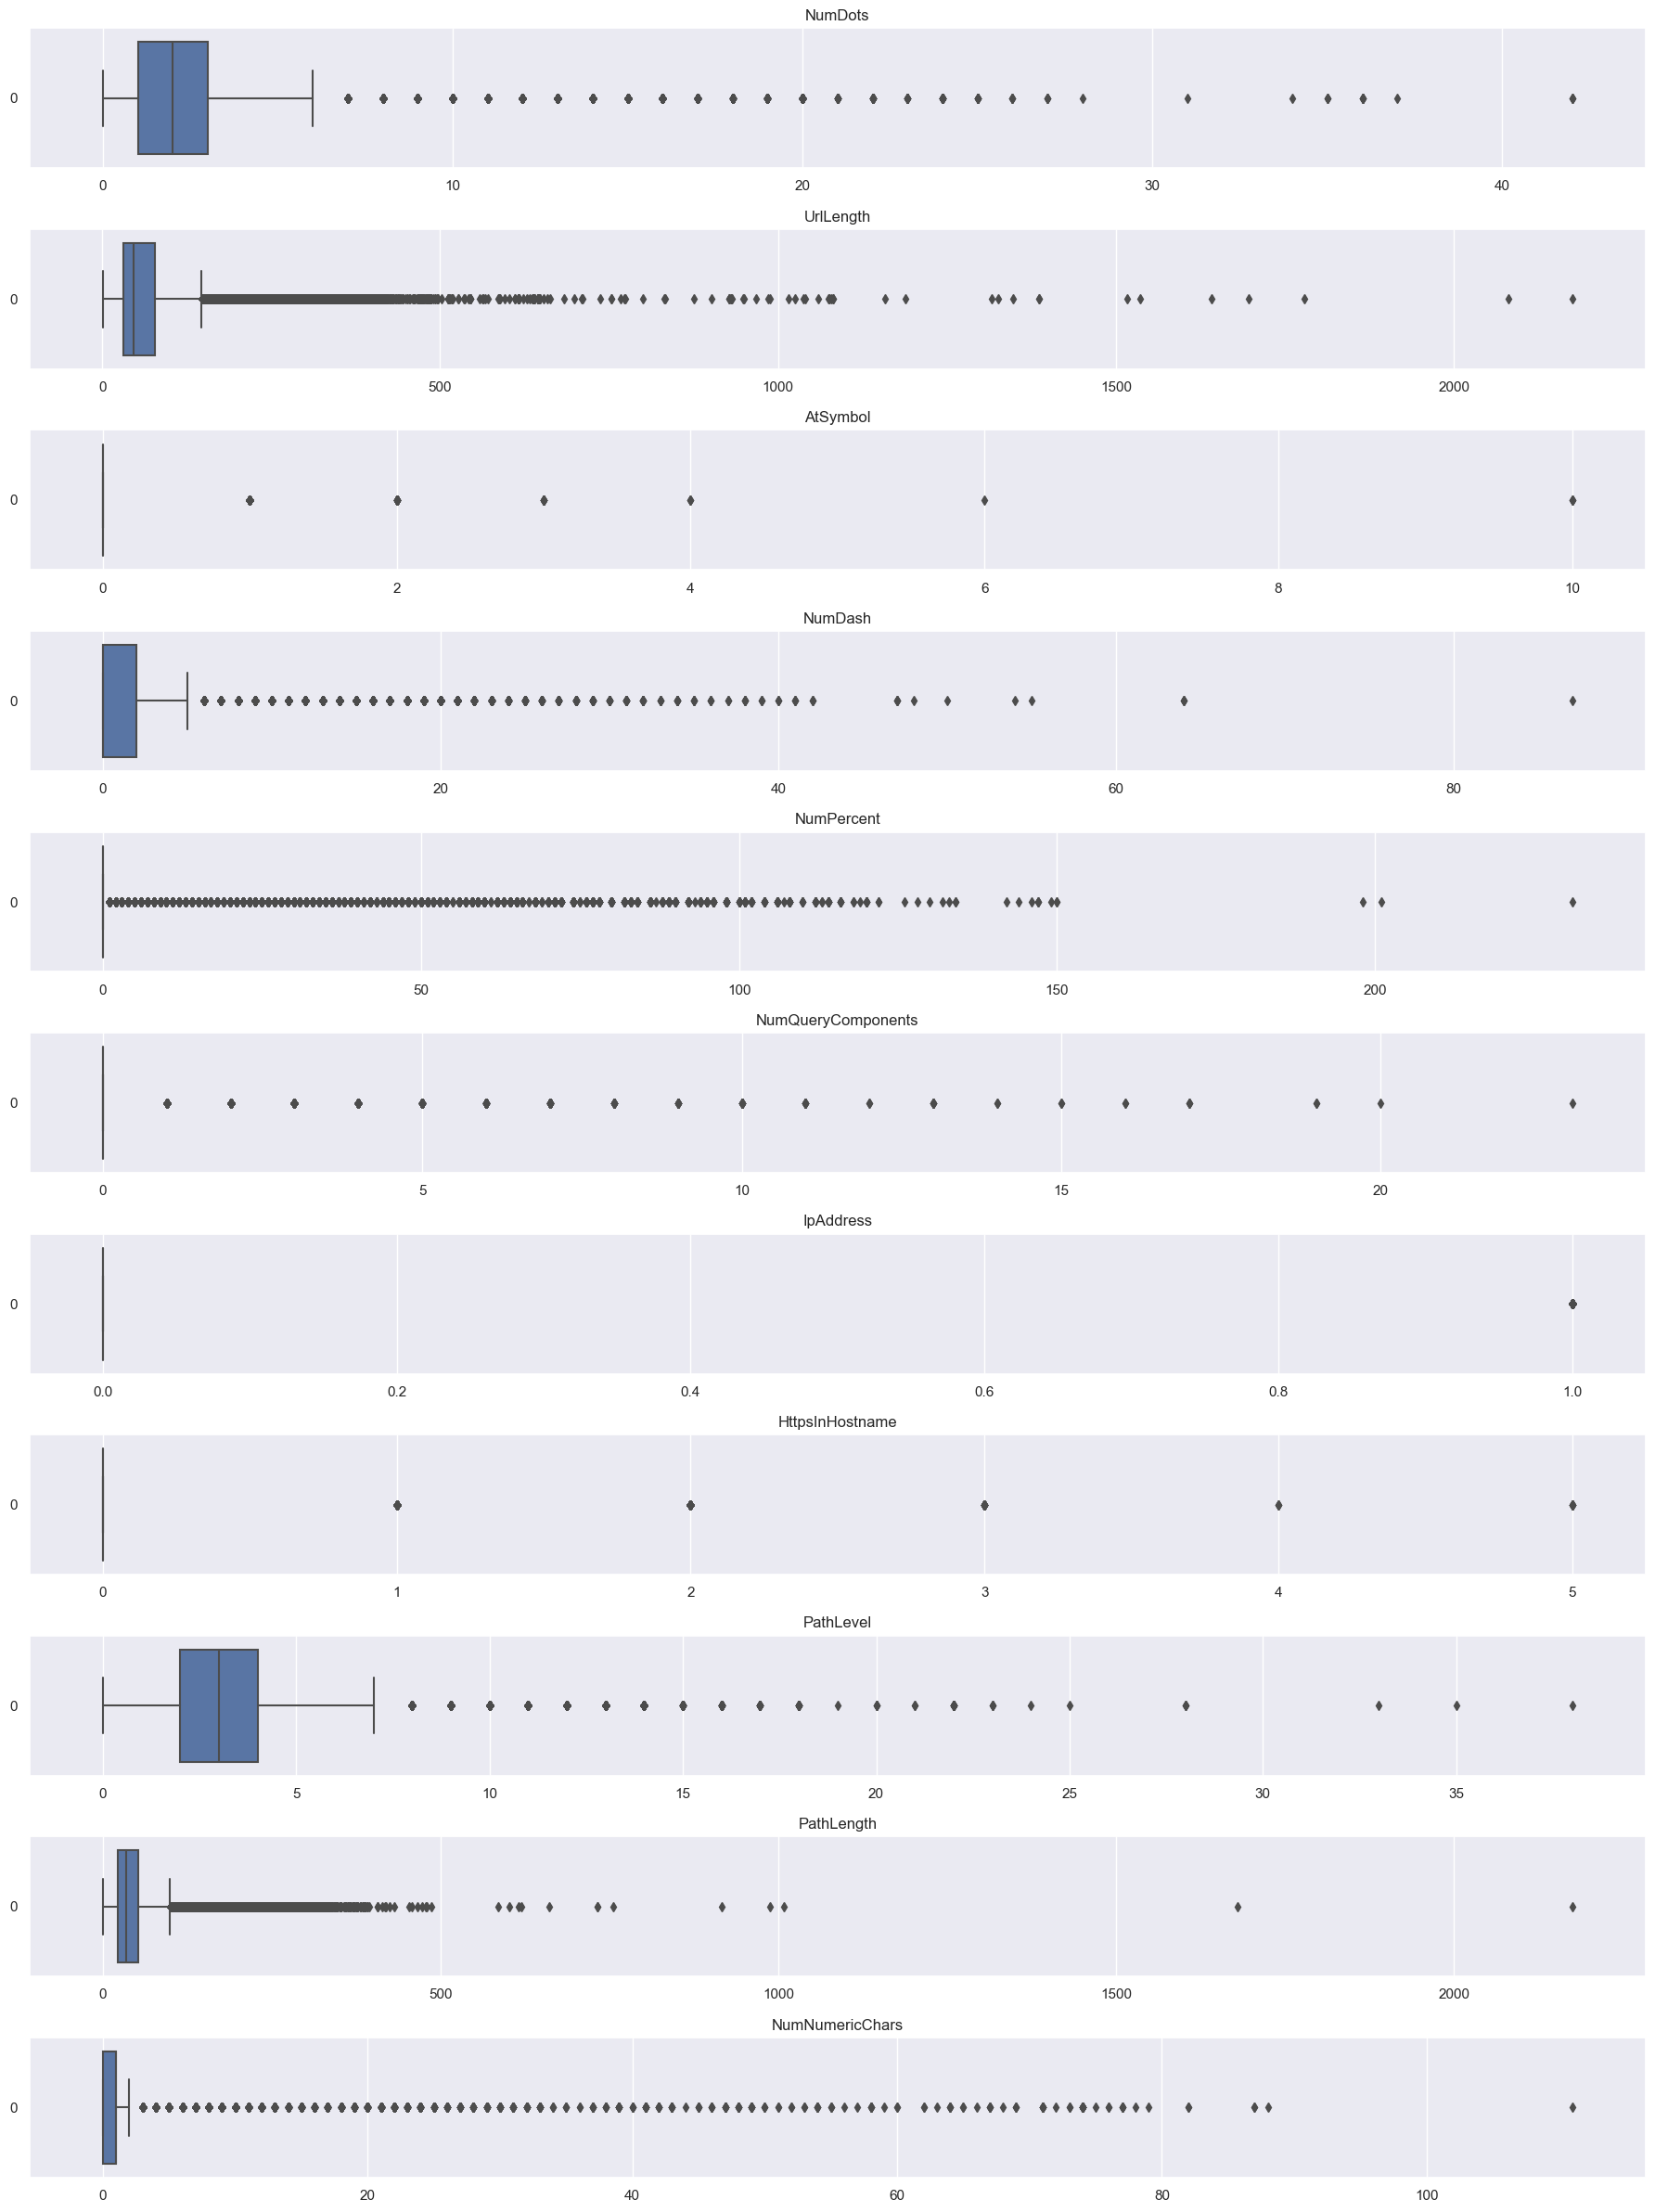

In [5]:
f, axes = plt.subplots(11, figsize=(18, 24))

count = 0
for i in X:
    sb.boxplot(data = X[i], orient = "h", ax = axes[count])
    axes[count].set_title(i)
    count += 1
plt.tight_layout()
plt.show()

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

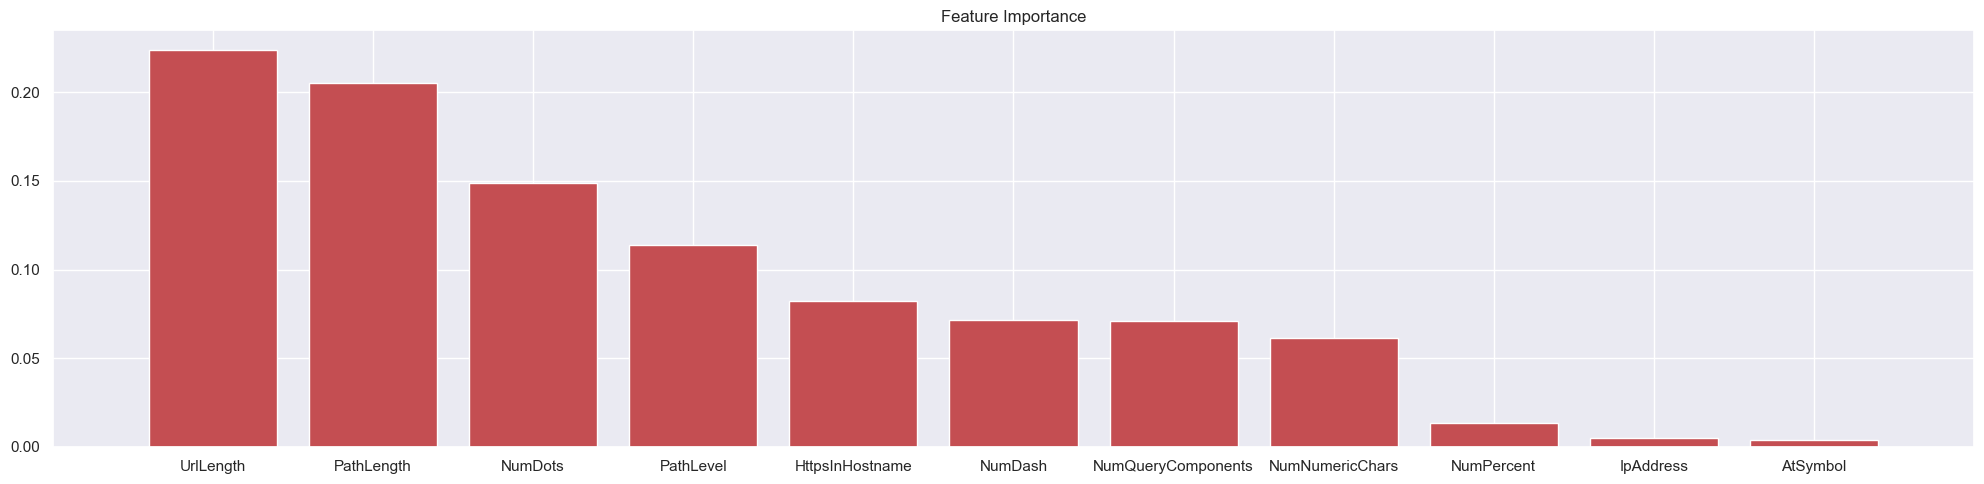

In [7]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [8]:
X = data.drop(columns = ['Phising', 'AtSymbol', 'IpAddress', 'NumPercent'])
Tar = data['Phising']

var = pd.DataFrame(X)
tar = pd.DataFrame(Tar)

X_train, X_test, y_train, y_test = train_test_split(var,tar,test_size = 0.2, random_state = 42)

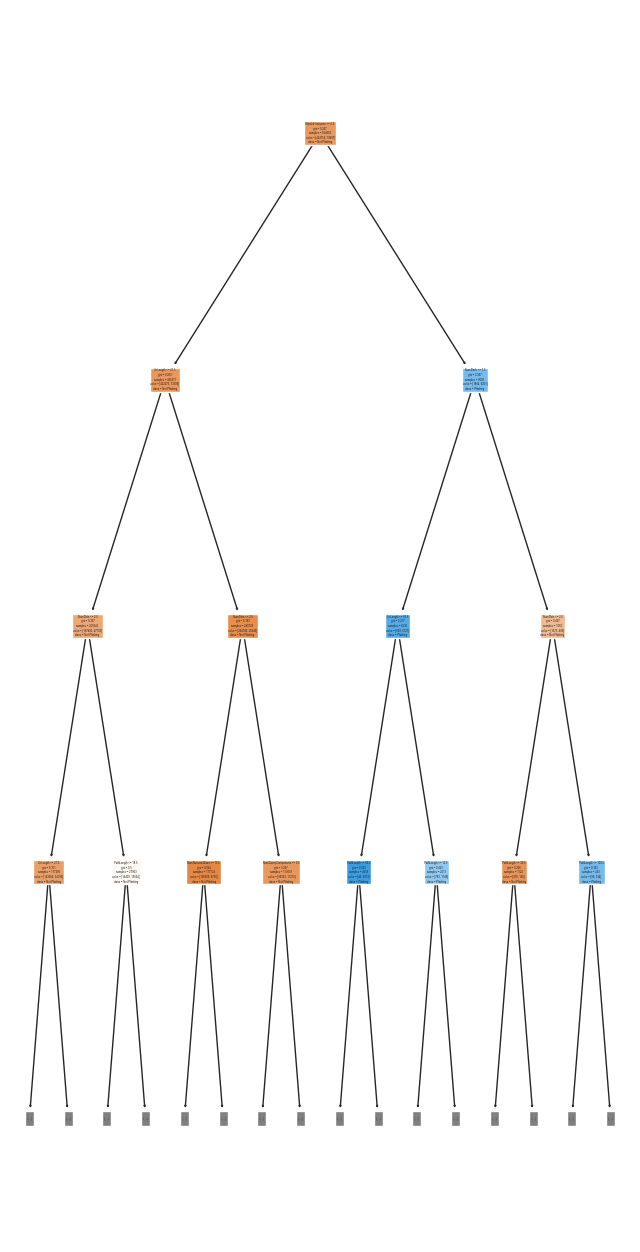

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(8, 16))
plot_tree(clf, max_depth = 3, filled=True, feature_names=X.columns.tolist(), class_names=['Not Phishing', 'Phishing'])
plt.show()

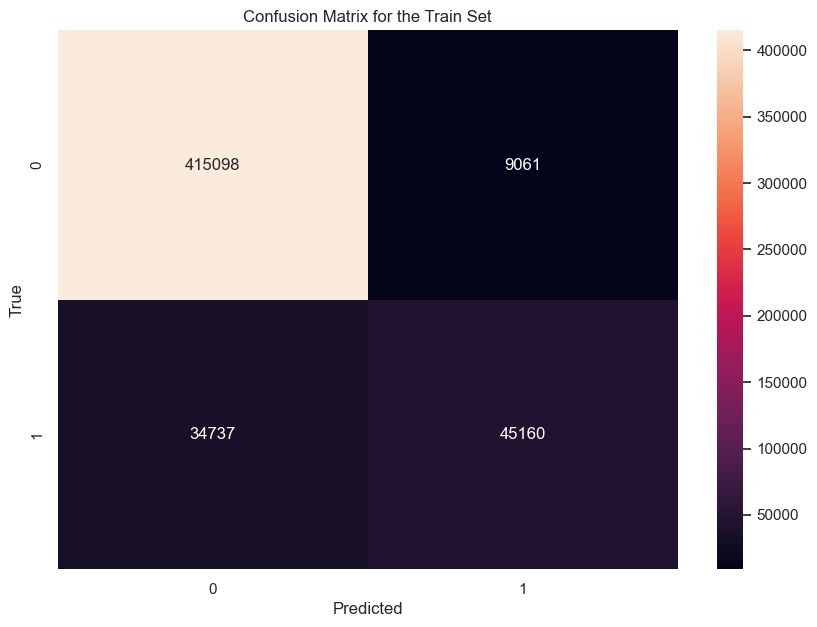

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.5652277307032805
True Negative Rate:  0.9786377278331946
False Positive Rate:  0.021362272166805373
False Negative Rate:  0.4347722692967195


In [10]:
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Train Set')
plt.show()

true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

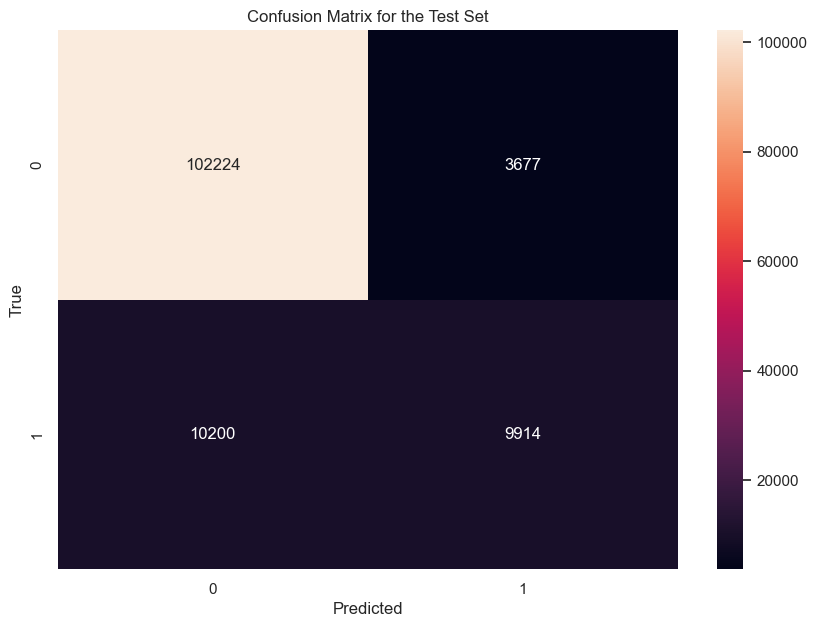

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.49289052401312516
True Negative Rate:  0.9652788925505897
False Positive Rate:  0.0347211074494103
False Negative Rate:  0.5071094759868748


In [11]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sb.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

true_positive = cm_test[1, 1]
true_negative = cm_test[0, 0]
false_positive = cm_test[0, 1]
false_negative = cm_test[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)
false_negative_rate = false_negative / (false_negative + true_positive)

print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

In [12]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

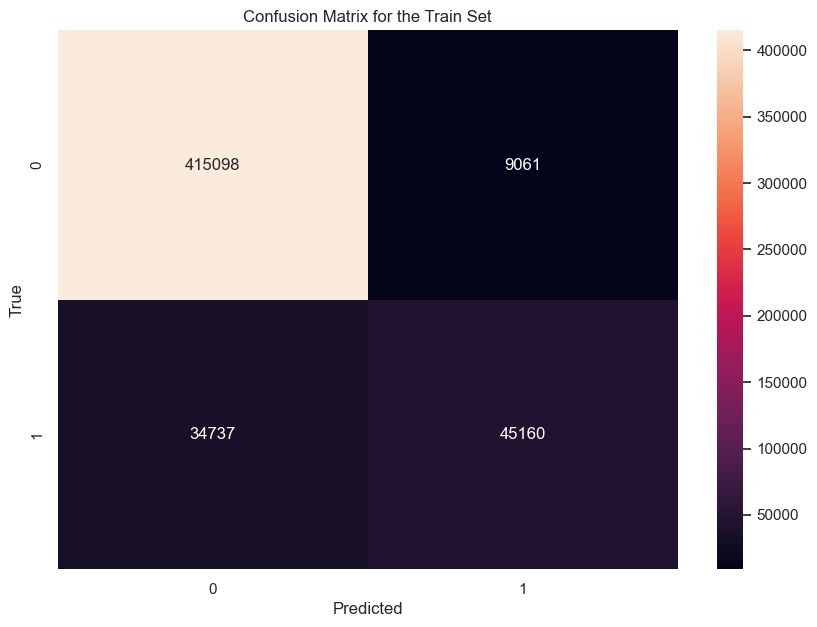

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.5652277307032805
True Negative Rate:  0.9786377278331946
False Positive Rate:  0.021362272166805373
False Negative Rate:  0.4347722692967195


In [13]:
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Train Set')
plt.show()

true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

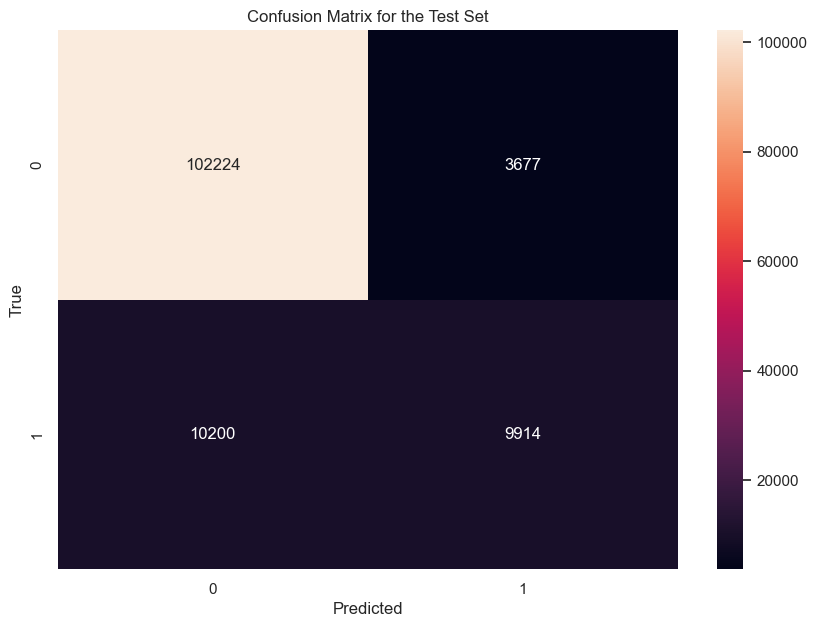

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.49289052401312516
True Negative Rate:  0.9652788925505897
False Positive Rate:  0.0347211074494103
False Negative Rate:  0.5071094759868748


In [14]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sb.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

true_positive = cm_test[1, 1]
true_negative = cm_test[0, 0]
false_positive = cm_test[0, 1]
false_negative = cm_test[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)
false_negative_rate = false_negative / (false_negative + true_positive)

print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

In [15]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fitting GridSearch to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
Best Score: 0.8942101684057132


In [17]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 20, max_features = 'log2', random_state=42)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=20, max_features='log2', random_state=42)

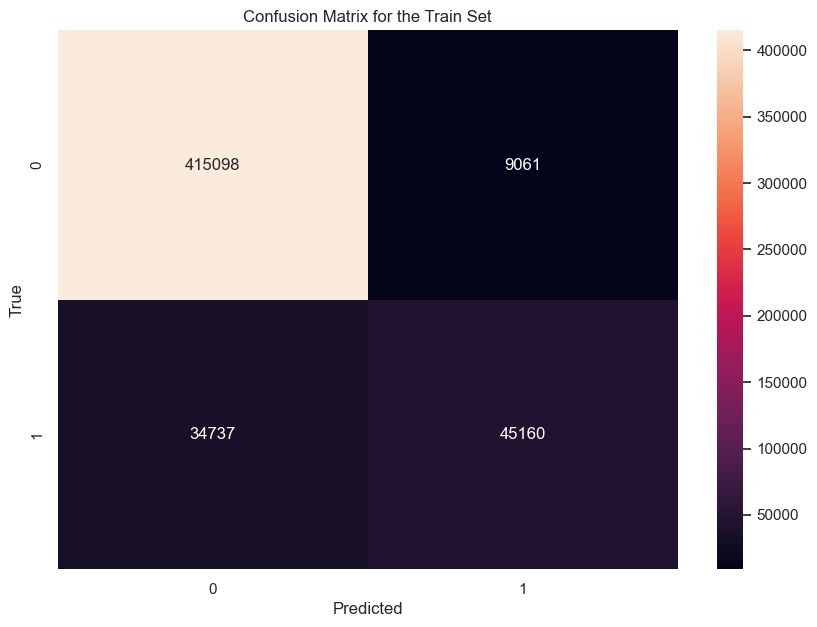

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.5652277307032805
True Negative Rate:  0.9786377278331946
False Positive Rate:  0.021362272166805373
False Negative Rate:  0.4347722692967195


In [18]:
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Train Set')
plt.show()

true_positive = cm[1, 1]
true_negative = cm[0, 0]
false_positive = cm[0, 1]
false_negative = cm[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

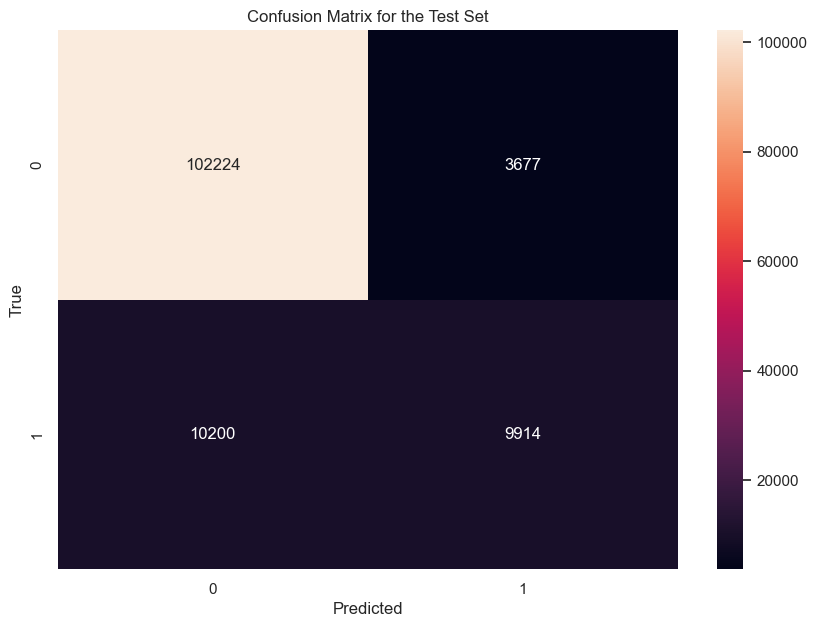

Classification Accuracy:  0.8898781891044717
True Positive Rate:  0.49289052401312516
True Negative Rate:  0.9652788925505897
False Positive Rate:  0.0347211074494103
False Negative Rate:  0.5071094759868748


In [19]:
y_pred_test = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(10, 7))
sb.heatmap(cm_test, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

true_positive = cm_test[1, 1]
true_negative = cm_test[0, 0]
false_positive = cm_test[0, 1]
false_negative = cm_test[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)
false_negative_rate = false_negative / (false_negative + true_positive)

print("Classification Accuracy: ", clf.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

In [20]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
numerical_features = var.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators = 100, max_depth = 20, max_features = 'log2', random_state=42))
])

pipeline.fit(X_train, y_train.values.ravel())
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred)}')

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89    105901
         1.0       0.48      0.84      0.61     20114

    accuracy                           0.83    126015
   macro avg       0.72      0.83      0.75    126015
weighted avg       0.89      0.83      0.85    126015

AUC-ROC: 0.8341692013317689


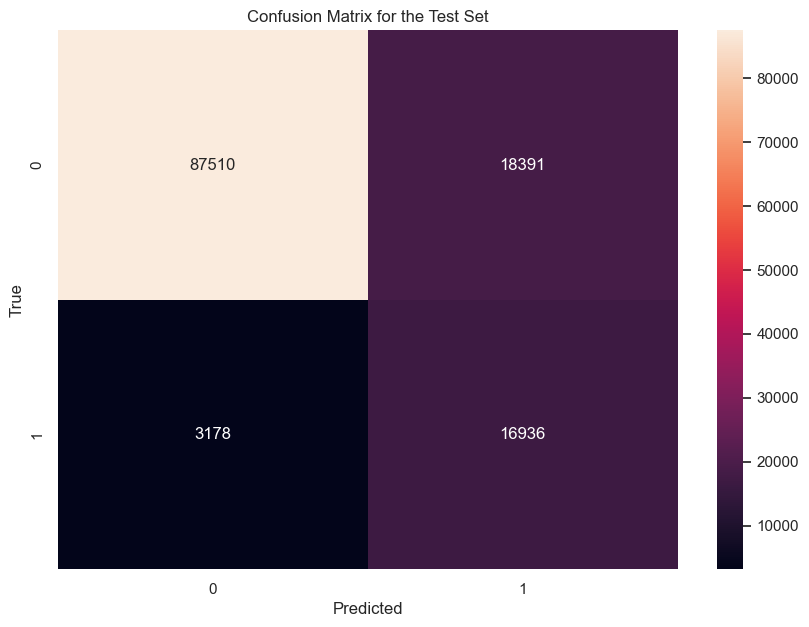

Classification Accuracy:  0.8934888703725747
True Positive Rate:  0.8420005965993835
True Negative Rate:  0.8263378060641543
False Positive Rate:  0.17366219393584575
False Negative Rate:  0.1579994034006165


In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Test Set')
plt.show()

true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", rfc.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)

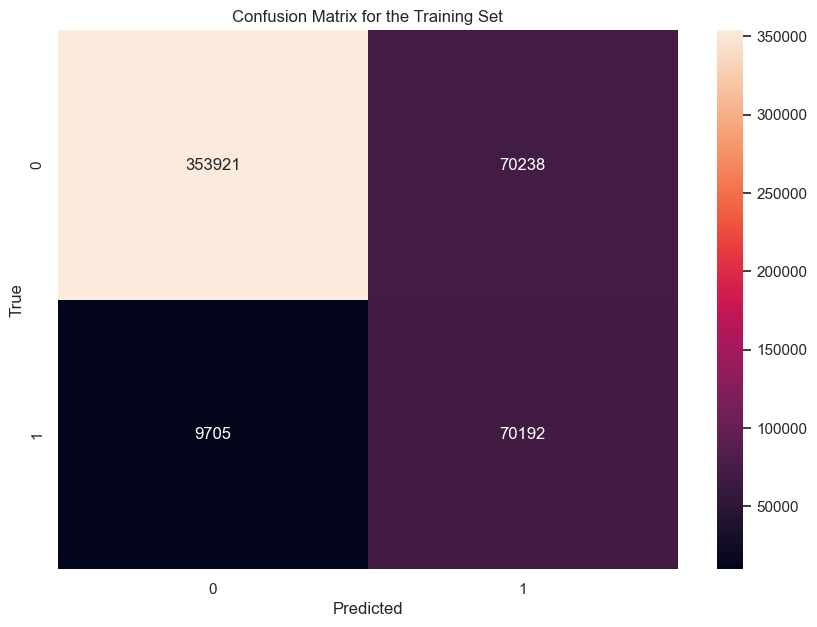

Classification Accuracy:  0.8934888703725747
True Positive Rate:  0.8785311088025833
True Negative Rate:  0.8344064372086882
False Positive Rate:  0.16559356279131174
False Negative Rate:  0.12146889119741668


In [24]:
y_train_pred = pipeline.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sb.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Training Set')
plt.show()

true_positive = conf_matrix[1, 1]
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]

true_positive_rate = true_positive / (true_positive + false_negative)

true_negative_rate = true_negative / (true_negative + false_positive)
false_positive_rate = false_positive / (false_positive + true_negative)

false_negative_rate = false_negative / (false_negative + true_positive)
print("Classification Accuracy: ", rfc.score(X_test, y_test))
print("True Positive Rate: ", true_positive_rate)
print("True Negative Rate: ", true_negative_rate)
print("False Positive Rate: ", false_positive_rate)
print("False Negative Rate: ", false_negative_rate)